In [11]:
import datetime
import sys
import scipy
import numpy
import matplotlib
import sklearn
import pandas
import yfinance as yf
import lxml
import pandas_datareader

print ('Python: {}:'.format(sys.version))
print( 'Scipy: {}'.format(scipy.__version__))
print( 'numpy: {}'.format(numpy.__version__))
print( 'matplotlib: {}'.format(matplotlib.__version__))
print( 'sklearn: {}'.format(sklearn.__version__))
print( 'pandas: {}'.format(pandas.__version__))
print ('yfinance: {}'.format(yf.__version__))
print ('lxml: {}'.format(lxml.__version__))
print ('pandas_datareader: {}'.format(pandas_datareader.__version__))

Python: 3.7.7 (default, Mar 10 2020, 15:43:33) 
[Clang 11.0.0 (clang-1100.0.33.17)]:
Scipy: 1.4.1
numpy: 1.18.2
matplotlib: 3.2.1
sklearn: 0.22.2.post1
pandas: 1.0.3
yfinance: 0.1.54
lxml: 4.5.0
pandas_datareader: 0.8.1


In [8]:
# Load libraries
from pandas import read_csv
from pandas_datareader import data as pdr
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [9]:
# Override yFinance with Pandas
yf.pdr_override() # <-- Here is the fix

In [12]:
# Set start and end dates
start = datetime.datetime(2018, 1, 1)
end   = datetime.datetime(2020, 4, 2)

# Grab data
stocks = "AAPL"
data = pdr.get_data_yahoo(stocks, start = start, end = end)

[*********************100%***********************]  1 of 1 completed


In [13]:
data.shape

(566, 6)

In [21]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,170.160004,172.300003,169.259995,172.259995,166.804016,25555900
2018-01-03,172.529999,174.550003,171.960007,172.229996,166.774963,29517900
2018-01-04,172.539993,173.470001,172.080002,173.029999,167.549622,22434600
2018-01-05,173.440002,175.369995,173.050003,175.000000,169.457214,23660000
2018-01-08,174.350006,175.610001,173.929993,174.350006,168.827820,20567800


In [116]:
data.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-19,247.389999,252.839996,242.610001,244.779999,244.779999,67964300
2020-03-20,247.179993,251.830002,228.000000,229.240005,229.240005,100423300
2020-03-23,228.080002,228.500000,212.610001,224.369995,224.369995,84188200
2020-03-24,236.360001,247.690002,234.300003,246.880005,246.880005,71882800
2020-03-25,250.750000,258.250000,244.300003,245.520004,245.520004,75900500
2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100
2020-03-31,255.600006,262.489990,252.000000,254.289993,254.289993,49250500


In [23]:
print(data.describe())

             Open        High         Low       Close   Adj Close  \
count  566.000000  566.000000  566.000000  566.000000  566.000000   
mean   208.958746  211.289258  206.930247  209.208428  206.417612   
std     41.938097   42.649628   41.531790   42.242195   43.337603   
min    143.979996  145.720001  142.000000  142.190002  139.753540   
25%    177.305004  179.275002  176.132504  177.162498  173.330582   
50%    199.065002  200.675003  197.680000  199.239998  196.845840   
75%    223.452503  225.722496  220.527500  223.725002  219.829231   
max    324.739990  327.850006  323.350006  327.200012  327.200012   

             Volume  
count  5.660000e+02  
mean   3.304835e+07  
std    1.568293e+07  
min    1.136200e+07  
25%    2.247872e+07  
50%    2.860705e+07  
75%    3.844012e+07  
max    1.067212e+08  


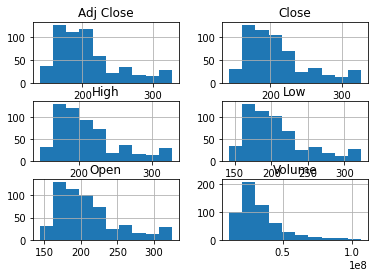

In [26]:
data.hist()
pyplot.show()

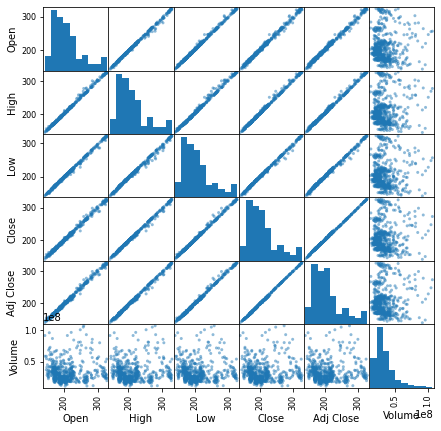

In [27]:
pandas.plotting.scatter_matrix(data, figsize=(7,7))
pyplot.show()

In [28]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,170.160004,172.300003,169.259995,172.259995,166.804016,25555900
2018-01-03,172.529999,174.550003,171.960007,172.229996,166.774963,29517900
2018-01-04,172.539993,173.470001,172.080002,173.029999,167.549622,22434600
2018-01-05,173.440002,175.369995,173.050003,175.000000,169.457214,23660000
2018-01-08,174.350006,175.610001,173.929993,174.350006,168.827820,20567800


In [29]:
data.shape

(566, 6)

In [106]:
# Okay I want My data to look like this:
#X_Train = Previous_high, Previous_Low, Previous_Volume, Previous_Close
#Y_Train = Close
arrayx = data.values
arrayy = data.values
X = arrayx[0:-1]
Y = arrayy[1:,3]
X.shape, Y.shape
print (Y[1], X[1, 3])
print (len(Y))

173.02999877929688 172.22999572753906
565


In [108]:
for index, element in enumerate(Y):
    if Y[index] > X[index,3]:
        Y[index] = 1
    else:
        Y[index] = 0
X_Train = X[0:452, :]
X_Validation = X[452:, :]
Y_Train = Y[0:452]
Y_Validation = Y[452:]
#X_Train, X_Validation, Y_Train, Y_Validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_Train.shape, Y_Train.shape, X_Validation.shape, Y_Validation.shape, X.shape, Y.shape)

(452, 6) (452,) (113, 6) (113,) (565, 6) (565,)


In [110]:
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

#Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold=StratifiedKFold(n_splits=2, random_state=1, shuffle=True)
    cv_results = sklearn.model_selection.cross_val_score(model, X_Train, Y_Train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print ('%s, %f, (%f)' % (name, cv_results.mean(), cv_results.std()))

LR, 0.535398, (0.000000)
LDA, 0.537611, (0.006637)
KNN, 0.460177, (0.013274)
CART, 0.524336, (0.028761)
NB, 0.528761, (0.011062)
SVM, 0.535398, (0.000000)


In [111]:
model = SVC(gamma='auto')
model.fit(X_Train, Y_Train)
predictions = model.predict(X_Validation)

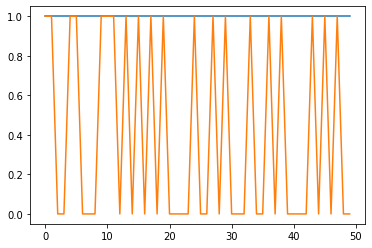

In [117]:
pyplot.plot(predictions[-50:])
pyplot.plot(Y_Validation[-50:])
pyplot.show()

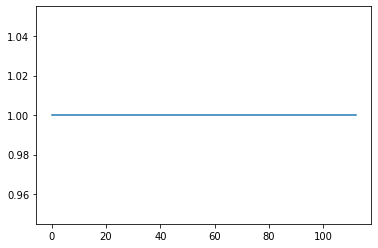

In [119]:
pyplot.plot(predictions[:])

In [120]:
# Let's try randomizing the training / test set. 
# Okay I want My data to look like this:
#X_Train = Previous_high, Previous_Low, Previous_Volume, Previous_Close
#Y_Train = Close
arrayx = data.values
arrayy = data.values
X = arrayx[0:-1]
Y = arrayy[1:,3]
X.shape, Y.shape
print (Y[1], X[1, 3])
print (len(Y))

173.02999877929688 172.22999572753906
565


In [121]:
for index, element in enumerate(Y):
    if Y[index] > X[index,3]:
        Y[index] = 1
    else:
        Y[index] = 0
X_Train, X_Validation, Y_Train, Y_Validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_Train.shape, Y_Train.shape, X_Validation.shape, Y_Validation.shape, X.shape, Y.shape)

(452, 6) (452,) (113, 6) (113,) (565, 6) (565,)


In [122]:
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

#Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold=StratifiedKFold(n_splits=2, random_state=1, shuffle=True)
    cv_results = sklearn.model_selection.cross_val_score(model, X_Train, Y_Train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print ('%s, %f, (%f)' % (name, cv_results.mean(), cv_results.std()))

LR, 0.522124, (0.000000)
LDA, 0.488938, (0.015487)
KNN, 0.446903, (0.004425)
CART, 0.533186, (0.024336)
NB, 0.526549, (0.000000)
SVM, 0.522124, (0.000000)


In [123]:
model = SVC(gamma='auto')
model.fit(X_Train, Y_Train)
predictions = model.predict(X_Validation)

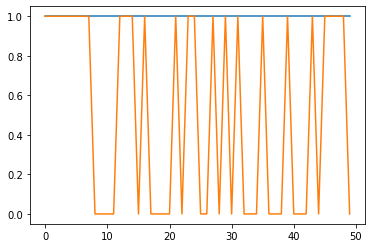

In [124]:
pyplot.plot(predictions[-50:])
pyplot.plot(Y_Validation[-50:])
pyplot.show()

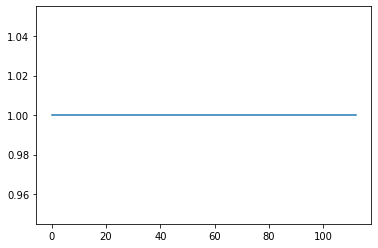

In [125]:
pyplot.plot(predictions[:])

In [127]:
model = GaussianNB()
model.fit(X_Train, Y_Train)
predictions = model.predict(X_Validation)

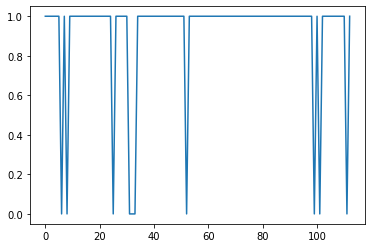

In [128]:
pyplot.plot(predictions[:])

In [129]:
print(accuracy_score(Y_Validation, predictions))

0.6017699115044248


Okay, so I don't think this worked very well because it was trying to predict the next day based on one single previous day.. no matter how many it trained on. 

If I were trying to predict the next day, I would want:
    The previous 6 month average 
    The previous week trend ( increasing / decreasing )
    relative strength index
    fifty two week high